# NT1 - Data Oganizer for geotechnical anaysis and plotting

### Query Data Organizer for parameters E, sigma_c, then write to lists and show report tables 

In [141]:
# set up spatial python ecosystem
import json
import pandas as pd
import numpy as np

In [142]:
# open Data Organizer
#   how to select project or projects?                                                    ToDo JK
from DataOrganizer import CouchbaseSelector
db = CouchbaseSelector('localhost','nem-data')  #db 'nem-data' used temporary 

In [197]:
# query Data Organizer records for 'parameter' = E 
#   sorting by borehole_code and sample_depth

# initialize variables
data_E=[]
# unsorted lists for checking
Et=[]
lithology=[]  
laboratory_test_code=[]
sample_depth=[]

parameter = 'E'
fields = ['borehole_code','sample_description','lithology','laboratory', 'laboratory_test_code', 'sample_depth_top_m', 
          'value', 'value_unit']
selector = {'data_source': 'Laboratory','project_code':'NT1r2'}
sort = ['borehole_code','sample_depth_top_m']
# db.setDebug(True)

# write selected fields to lists
for rec in db.get_parameter(parameter, fields, selector, sort):
    ##print (rec['value'])
    ##print type(rec['value']) is float
    if type(rec['value']) is not float:
        print (rec['value'])
    else:
        print 'NaN'
    # print rec 
    # write rec to nem_data_es
    data_E.append(rec)
    try:
        type(float(rec['value']))
        Et.append(rec['value'])
    except:
        Et.append('NaN')
        print "check value data for E=", rec['value']
    try:
        lithology.append(rec['lithology'])
    except:
        print "check lithology data for E=", rec['value']
    try:
        laboratory_test_code.append(rec['laboratory_test_code'])
    except:
        print "check laboratory_test_code data for E=", rec['value']
    try:
        sample_depth.append(rec['sample_depth_top_m'])
    except:
        print "check sample_depth data for E=", rec['value']
    # there must be a more elegant way of checking that data exists                               Todo JK  
    # how to mark missing data as 'NaN'?

3352.00
3532.00
3142.00
13200.00
51400.00
17800.00
19700.00
22100.00
4170.00
2790.00
6760.00
11400.00
20700.00
2017.00
7780.00
4290.00
7450.00
12000.00
2669.00
2200.00
1000.00
2000.00

check value data for E= 
1902.00
1413.00
4895.00
3232.00
2597.00
4913.00
4594.00
5650.00
-
check value data for E= -
27000.00
2000.00

check value data for E= 
1600.00
2400.00
1300.00
2300.00
1600.00

check value data for E= 


In [198]:
Et

[u'3352.00',
 u'3532.00',
 u'3142.00',
 u'13200.00',
 u'51400.00',
 u'17800.00',
 u'19700.00',
 u'22100.00',
 u'4170.00',
 u'2790.00',
 u'6760.00',
 u'11400.00',
 u'20700.00',
 u'2017.00',
 u'7780.00',
 u'4290.00',
 u'7450.00',
 u'12000.00',
 u'2669.00',
 u'2200.00',
 u'1000.00',
 u'2000.00',
 'NaN',
 u'1902.00',
 u'1413.00',
 u'4895.00',
 u'3232.00',
 u'2597.00',
 u'4913.00',
 u'4594.00',
 u'5650.00',
 'NaN',
 u'27000.00',
 u'2000.00',
 'NaN',
 u'1600.00',
 u'2400.00',
 u'1300.00',
 u'2300.00',
 u'1600.00',
 'NaN']

In [169]:
float(u'7780.00')

7780.0

In [153]:
# data report for E
# input: data_E
#   report should also provide count information (see below "reference from Alan")                Todo JK

# write returned Data Organizer list to a pandas data frame
data_E_df = pd.DataFrame(data=data_E)



# display nem_data_df as html using pandas df.to_html()
####pd.set_option('display.notebook_repr_html', True)  #?


# Construct a mask of which columns are numeric
####numeric_col_mask = data_E_df.dtypes.apply(lambda d: issubclass(np.dtype(d).type, np.number))

# Dict used to center the table headers
####d = dict(selector="th",
####    props=[('text-align', 'center')])

# Style
####data_E_df.style.set_properties(subset=data_E_df.columns[numeric_col_mask], # right-align the numeric columns and set their width
####                        **{'width':'10em', 'text-align':'right'})\
####        .set_properties(subset=data_E_df.columns[~numeric_col_mask], # left-align the non-numeric columns and set their width
####                        **{'width':'10em', 'text-align':'left'})\
####        .format(lambda x: '{:,.0f}'.format(x) if x > 1e3 else '{:,.2f}'.format(x), # format the numeric values
####                subset=pd.IndexSlice[:,data_E_df.columns[numeric_col_mask]])\
####        .set_table_styles([d]) # center the header


####pd.options.display.float_format = lambda x: '{:,.0f}'.format(x) if x > 1e3 else '{:,.2f}'.format(x)


from IPython.core.display import display, HTML
display(HTML('<h4>NT1 data - E </h4>'))


####display(HTML(data_E_df.to_html(float_format=lambda x: '%10.1f' % x)))

####display(HTML(data_E_df.to_html(float_format=(lambda x : '%10.1f'.format(x)))))
####display(HTML(data_E_df.to_html(formatters=(none,none,none,none,(lambda x : '%10.1f'.format(x)),none,none,none))))

#display(HTML(data_E_df.to_html(formatters={'value':lambda x: '%10.2f' % (float(x))})))
#display(HTML(data_E_df.to_html(formatters={'value':lambda x: u'{:06.2f}'.format(float(x))})))

display(HTML(data_E_df.to_html()))

,borehole_code,laboratory,laboratory_test_code,lithology,sample_depth_top_m,sample_description,value,value_unit
0,NT1-1,,56,Conglomerate,27.1,Basic Design,3352.00,MPa
1,NT1-1,,57,Conglomerate,61.5,Basic Design,3532.00,MPa
2,NT1-11,,70,Sandstone,15.65,Basic Design,3142.00,MPa
3,NT1-14,KhonKaen University,33,Red Sandstone,28.9,Construction Design,13200.00,MPa
4,NT1-14,KhonKaen University,34,Red Sandstone,36.8,Construction Design,51400.00,MPa
5,NT1-14,KhonKaen University,35,Red Sandstone,37.3,Construction Design,17800.00,MPa
6,NT1-14,KhonKaen University,36,Red Sandstone,37.3,Construction Design,19700.00,MPa
7,NT1-14,KhonKaen University,37,Red Sandstone,56.8,Construction Design,22100.00,MPa
8,NT1-15,KhonKaen University,38,Siltstone,32.2,Construction Design,4170.00,MPa
9,NT1-18,KhonKaen University,40,Siltstone,23.5,Construction Design,2790.00,MPa


In [151]:
# query Data Organizer records for 'parameter' = E measured as E50 and Et (appear to be same measurement)
#  sorting by borehole_cod and sample_depth, where measurement_convention = E50 or Et (!= Es)

# initialize variables
nem_data_e50=[]
# unsorted lists for checking
E50=[]
lithology=[]
laboratory_test_code=[]
sample_depth=[]

# query Data Organiser for E50 records
parameter = 'E'
fields = ['borehole_code','lithology','laboratory', 'laboratory_test_code', 'sample_depth_top_m', 
          'measurement_convention', 'value', 'value_unit']
selector = {'data_source': 'Laboratory'}
sort = ['borehole_code','sample_depth_top_m']

# write selected fields to lists, where measurement_convention = Es
for rec in db.get_parameter(parameter, fields, selector, sort):
    if rec['measurement_convention'] != 'Es':
        # write rec to nem_data_e50
        nem_data_e50.append(rec)

print len(nem_data_e50)

105


In [28]:
# data report
# input: nem_data_e50

nem_data_e50_s_df = pd.DataFrame(data=nem_data_e50)

# display nem_data_df as html using pandas df.to_html()
from IPython.core.display import display, HTML
display(HTML('<h4>NEM data for E50 </h4>'))
display(HTML(nem_data_e50_s_df.to_html()))

""


In [265]:
# query Data Organizer records for 'parameter' = sigma_c
#  sorting by borehole_cod and sample_depth

# initialize variables
nem_data_sigma_c=[]
# unsorted lists for checking
sigma_c=[]
lithology=[]  
laboratory_test_code=[]
sample_depth=[]

parameter = 'sigma_c'
fields = ['borehole_code','lithology','laboratory', 'laboratory_test_code', 'sample_depth_top_m', 'value', 'value_unit']
selector = {'data_source': 'Laboratory'}
sort = ['borehole_code','sample_depth_top_m']

# write selected fields to lists
for rec in db.get_parameter(parameter, fields, selector, sort):
    # print rec 
    # write rec to nem_data_e   
    nem_data_sigma_c.append(rec)

print len(nem_data_sigma_c)

32


In [266]:
# data report
# input: nem_data_sigma_c

nem_data_sigma_c_s_df = pd.DataFrame(data=nem_data_sigma_c)#nem_data_df = nem_data_df.fillna('NaN').T

# display nem_data_df as html using pandas df.to_html()
from IPython.core.display import display, HTML
display(HTML('<h4>NEM data for sigma_c </h4>'))
display(HTML(nem_data_sigma_c_s_df.to_html()))

,borehole_code,laboratory,laboratory_test_code,lithology,sample_depth_top_m,value,value_unit
0,NE1-01,KhonKaen University,4,Diorite,13.45-13.55,93.13,MPa
1,NE1-01,KhonKaen University,5,Diorite,13.55-13.65,223.71,MPa
2,NE1-01,KhonKaen University,6,Diorite,13.75-13.85,175.22,MPa
3,NE1-01,KhonKaen University,10,Diorite,22.80-23.10,84.78,MPa
4,NE1-02,KhonKaen University,11,Diorite,19.80-20.00,153.5,MPa
5,NE1-02,KhonKaen University,7,Diorite,23.00-23.70,182.67,MPa
6,NE1-02,KhonKaen University,9,Diorite,23.00-23.70,222.84,MPa
7,NE1-02,KhonKaen University,8,Diorite,23.00-23.70,172.15,MPa
8,NE1-02,KhonKaen University,12,Pegmatite,25.15-25.25,211.63,MPa
9,NE1-02,KhonKaen University,13,Diorite,28.80-28.90,167.37,MPa


In [267]:
# remove records for sigma_c if no record for Es at the sample_depth
#   note that it is not checked if there are E values with no record for sigma_c at the sample_depth
# input: nem_data_sigma_c

nem_data_sigma_c_s_adj = []  # adjusted list
i=0

#for item in nem_data_sigma_c:
for item in nem_data_sigma_c:
    # check if a record exists with an E value at the sample_depth of the item
    # and append to the adjusted list if record exists 
    if any(d['sample_depth_top_m'] == (nem_data_sigma_c[i]['sample_depth_top_m']) for d in nem_data_es):
        #print nem_data_sigma_c[i]['borehole_code']
        nem_data_sigma_c_s_adj.append(item)
        i+=1
    else:
        i=1+i
        pass

In [268]:
# data report
#   report should also provide count information (see below "reference from Alan")
# input: nem_data_sigma_c_s_adj

nem_data_sigma_c_s_adj_df = pd.DataFrame(data=nem_data_sigma_c_s_adj)#nem_data_df = nem_data_df.fillna('NaN').T

# display nem_data_sigma_c_adj_df as html using pandas df.to_html()
from IPython.core.display import display, HTML
display(HTML('<h4>NEM data for sigma_c </h4>'))
display(HTML(nem_data_sigma_c_s_adj_df.to_html()))

,borehole_code,laboratory,laboratory_test_code,lithology,sample_depth_top_m,value,value_unit
0,NE1-01,KhonKaen University,10,Diorite,22.80-23.10,84.78,MPa
1,NE1-02,KhonKaen University,11,Diorite,19.80-20.00,153.5,MPa
2,NE1-02,KhonKaen University,12,Pegmatite,25.15-25.25,211.63,MPa
3,NE1-02,KhonKaen University,13,Diorite,28.80-28.90,167.37,MPa
4,NE1-03,KhonKaen University,14,Pegmatite,19.50-19.60,122.42,MPa
5,NE1-04,LTEC,26,Granodiorite,100.45-100.55,60.26,MPa
6,NE1-04,LTEC,27,Granodiorite,24.1-24.25,9.71,MPa
7,NE1-04,LTEC,28,Granodiorite,98.20-98.3,84.46,MPa
8,NE1-07,KhonKaen University,15,Sandstone,28.00-28.25,104.25,MPa
9,NE1-07,KhonKaen University,17,Sandstone,32.60-33.00,134.33,MPa


### Plot histograms for Es, E50 data including a plot for only sandstone lithology data

In [269]:
# prepare Es values for histogram 
# input: nem_data_es

data_e=[]

for item in nem_data_es:
    data_e.append(float(item['value']))
    
print data_e

[12800.0, 18100.0, 29700.0, 18300.0, 5650.0, 5769.2, 2574.3, 8076.9, 14600.0, 13300.0, 16800.0, 30500.0, 22100.0, 3891.9, 6375.0, 10769.2, 8139.5, 21500.0, 15700.0, 30600.0, 19300.0, 14800.0, 19200.0]


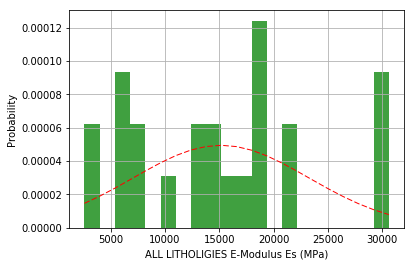

15154.173913
8069.82420353


23

In [270]:
# plot histogram of all E50 values
# input: data_e containing 'values' of 'parameter' E

import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from scipy.stats import norm

# input: E containing 'values' of 'parameter' E
E = data_e

# plot histogram of E values for all rock lithologies
#   plt.hist(values, number of bins, additional named parameters)
hist,bin_edges,patches = plt.hist(E, 20, normed=1, facecolor='green', alpha=0.75)

# just guessing at distribution
#mu, sigma = 15000, 10000
#y = mlab.normpdf( bin_edges, mu, sigma)
#l = plt.plot(bin_edges, y, 'b--', linewidth=1)

# calculate distribution of E values using scipy
param = norm.fit(E) 
# now, param[0] and param[1] are the mean and the standard deviation of the fitted distribution
y = mlab.normpdf( bin_edges, param[0], param[1])
ll = plt.plot(bin_edges, y, 'r--', linewidth=1)

# plot axis labels and grid
plt.ylabel('Probability')
plt.xlabel('ALL LITHOLIGIES E-Modulus Es (MPa)')
plt.grid(True)
plt.show()

print(param[0])  # mean
print(param[1])  # standard deviation
len(E) # one more check

# Note that we really need to introduce a skewed distribution

In [271]:
# prepare E50 values for histogram 
# input: nem_data_e50

data_e=[]

for item in nem_data_e50:
    data_e.append(float(item['value']))
    
#print data_e

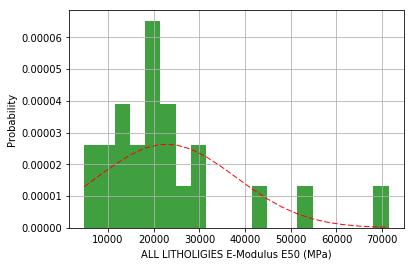

22808.5304348
15120.4863707


23

In [272]:
# plot histogram of all E50 values
# input: data_e containing 'values' of 'parameter' E

E = data_e

# plot histogram of E values for all rock lithologies
hist,bin_edges,patches = plt.hist(E, 20, normed=1, facecolor='green', alpha=0.75)

# calculating distribution of E values using scipy
param = norm.fit(E) 
y = mlab.normpdf( bin_edges, param[0], param[1])
ll = plt.plot(bin_edges, y, 'r--', linewidth=1)

# plot axis labels and grid
plt.ylabel('Probability')
plt.xlabel('ALL LITHOLIGIES E-Modulus E50 (MPa)')
plt.grid(True)
plt.show()

print(param[0])  # mean
print(param[1])  # standard deviation
len(E) # one more check

In [273]:
# prepare lithology data to select sandstone lithologes for histogram 
# input: nem_data_e50

data_lithology=[]

for item in nem_data_e50:   
    data_lithology.append(item['lithology'])

#print data_lithology
print len(data_lithology)

23


In [274]:
# prepare E50 values for sandstone for histogram 
# input: nem_data_e50
#        data_lithology

sandstone_i=[]
sandstone_E=[]

# select E values where 'lithology' is Sandstone
for i in range(0,len(data_lithology)):
    if data_lithology[i]=='Sandstone':
        sandstone_i.append(i)
        #print i, data_lithology[i]
        sandstone_E.append(float(nem_data_e50[i]['value']))
        #print nem_data_e50[i]['lithology']

print(sandstone_i)
print(sandstone_E)

[8, 9, 10, 11, 12]
[21290.0, 19170.0, 20800.0, 30450.0, 44310.0]


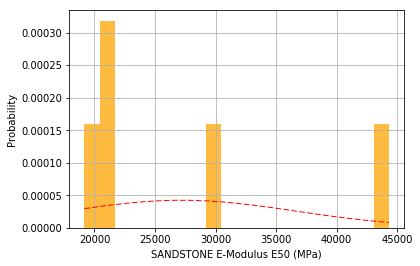

27204.0
9420.01613587


5

In [275]:
# plot histogram of all E50 values for sandstone 
# input: sandstone_E containing 'values' of 'parameter' E for sandstone

# plot histogram for E values of Sandstones
n, bins, patches = plt.hist(sandstone_E, 20, normed=1, facecolor='orange', alpha=0.75)
#n, bins, patches = plt.hist(sandstone_E, 20,facecolor='orange', alpha=0.75)
#   without 'normed=1', don't get sensible distribution fit

# calculating distribution with data using scipy
param = norm.fit(sandstone_E) 
# now, param[0] and param[1] are the mean and 
# the standard deviation of the fitted distribution
y = mlab.normpdf( bins, param[0], param[1])
ll = plt.plot(bins, y, 'r--', linewidth=1)

plt.ylabel('Probability')
plt.xlabel('SANDSTONE E-Modulus E50 (MPa)')
plt.grid(True)
plt.show()

print(param[0])
print(param[1])
len(sandstone_E)

## Scatterplot of E50 vs sigma_c data

In [276]:
# prepare sigma_c values for scatterplot 
# input: nem_data_sigma-c

data_sigma_c=[]

for item in nem_data_sigma_c_s_adj:
    data_sigma_c.append(item['value'])
    
#print data_sigma_c
print len(data_sigma_c)

23


In [277]:
# check data and prepare scatterplot

# check number or records same for all data lists
print(len(data_e))
print(len(data_sigma_c))   
print(len(data_lithology))

# assign colors to lithologies for use in scatterplot
colors=[]
for i in range(0,len(data_lithology)):
    if data_lithology[i]=='Sandstone':
        colors.append('orange')
    elif data_lithology[i]=='Diorite':
        colors.append('black')
    elif data_lithology[i]=='Pegmatite':
        colors.append('blue')
    elif data_lithology[i]=='Granodiorite':
        colors.append('gray')
    elif data_lithology[i]=='Sericite':
        colors.append('green')
    else:
        colors.append('red')
        
#print(colors)

23
23
23


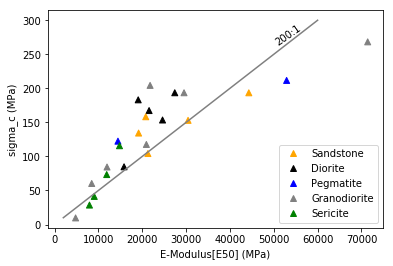

In [278]:
# scatterplot of E50 against sigma_c for all rock lithologies
# input: data_e, data_sigma_c containing 'values' of 'parameter' E and sigma_c
#        colors containg list of colors for lithologies in records (colors previously assigned lithologies)

from matplotlib.lines import Line2D

# scatterplot
rock_plot=plt.scatter([data_e],[data_sigma_c],color=colors,marker='^')

# legend
sym1 = Line2D([0], [0], linestyle="none", marker="^", alpha=1.0, color="orange")
sym2 = Line2D([0], [0], linestyle="none", marker="^", alpha=1.0, color="black")
sym3 = Line2D([0], [0], linestyle="none", marker="^", alpha=1.0, color="blue")
sym4 = Line2D([0], [0], linestyle="none", marker="^", alpha=1.0, color="gray")
sym5 = Line2D([0], [0], linestyle="none", marker="^", alpha=1.0, color="green")
plt.legend((sym1,sym2,sym3,sym4,sym5),("Sandstone","Diorite","Pegmatite","Granodiorite","Sericite"),
           numpoints=1,loc="best")

# axis labels
plt.ylabel('sigma_c (MPa)')
plt.xlabel('E-Modulus[E50] (MPa)')
plt.plot((2000,20000,40000,60000),(10,100,200,300), color="gray")

# a reference trend line
plt.annotate("200:1",xy=(50000,250),xytext=(50000,285),rotation=35)

plt.show()